# Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Import data

In [2]:
data = pd.read_csv('D:/Projects/ISM/DataScience/SC/analytics_fundamentals/assignment_1_data.csv')

In [3]:
data.describe()

,ANSWERED,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,PRODUCT
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546062,33772.511795,0.054671,34.792232,1.915537,1.141133,0.211158,0.681297,0.241222,1.462717,0.963971,2.347614,0.092259,1.528369
std,0.497882,29379.441396,0.227340,11.266942,0.658561,0.348165,0.408137,0.465981,0.427832,1.232531,1.489284,1.200262,0.289396,1.621094
min,0.000000,1417.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13578.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23418.500000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41763.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,161107.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


# Clean data

### Removing records having
###          - ANSWERED = 0 and PRODUCT ≠ 0 
###          - ANSWERED = 1 and PRODUCT = 0 

In [4]:
data = data[~((data['ANSWERED'] == 0) & (data['PRODUCT'] != 0))]
data = data[~((data['ANSWERED'] == 1) & (data['PRODUCT'] == 0))]

In [5]:
data.describe()

,ANSWERED,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,PRODUCT
count,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000
mean,0.555706,33668.684249,0.054268,34.776559,1.915660,1.140868,0.212554,0.679895,0.241311,1.469641,0.970914,2.351984,0.092597,1.558130
std,0.496897,29220.431386,0.226551,11.265057,0.657409,0.347892,0.409123,0.466526,0.427887,1.232262,1.492451,1.200636,0.289873,1.623809
min,0.000000,1417.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13543.500000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23429.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41508.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,161107.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


# EDA

In [6]:
data.head()

,ANSWERED,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,PRODUCT
1,0,14754,0,25,1,1,0,1,0,3,0,3,1,0
2,1,37945,0,62,2,1,0,0,1,1,0,4,0,2
3,0,12504,0,32,2,1,0,1,0,1,0,1,0,0
4,0,12423,0,57,1,2,0,0,1,2,1,4,0,0
6,1,9592,0,24,2,1,0,1,0,3,0,2,0,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24342 entries, 1 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ANSWERED        24342 non-null  int64
 1   INCOME          24342 non-null  int64
 2   FEMALE          24342 non-null  int64
 3   AGE             24342 non-null  int64
 4   JOB             24342 non-null  int64
 5   NUM_DEPENDENTS  24342 non-null  int64
 6   RENT            24342 non-null  int64
 7   OWN_RES         24342 non-null  int64
 8   NEW_CAR         24342 non-null  int64
 9   CHK_ACCT        24342 non-null  int64
 10  SAV_ACCT        24342 non-null  int64
 11  NUM_ACCTS       24342 non-null  int64
 12  MOBILE          24342 non-null  int64
 13  PRODUCT         24342 non-null  int64
dtypes: int64(14)
memory usage: 2.8 MB


In [8]:
data.describe()

,ANSWERED,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,PRODUCT
count,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000,24342.000000
mean,0.555706,33668.684249,0.054268,34.776559,1.915660,1.140868,0.212554,0.679895,0.241311,1.469641,0.970914,2.351984,0.092597,1.558130
std,0.496897,29220.431386,0.226551,11.265057,0.657409,0.347892,0.409123,0.466526,0.427887,1.232262,1.492451,1.200636,0.289873,1.623809
min,0.000000,1417.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13543.500000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23429.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41508.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,161107.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


## ANSWERED

In [9]:
data['ANSWERED'].value_counts(normalize=True) * 100

1    55.570619
0    44.429381
Name: ANSWERED, dtype: float64

## INCOME, AGE, NUM_DEPENDENTS , NUM_ACCTS

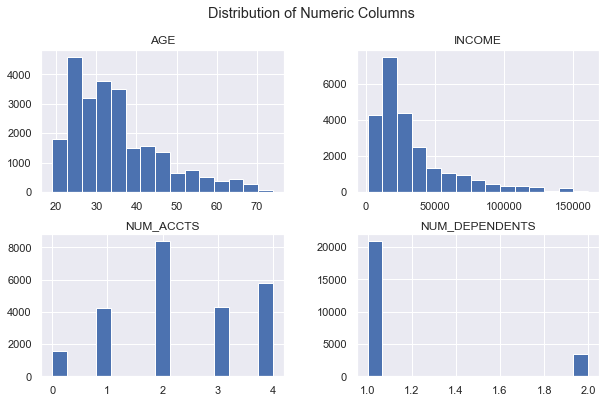

In [10]:
# Histograms for distribution
numeric_columns = ['INCOME', 'AGE', 'NUM_DEPENDENTS', 'NUM_ACCTS']
data[numeric_columns].hist(bins=15, figsize=(10, 6))
plt.suptitle('Distribution of Numeric Columns')
plt.show()

## FEMALE, JOB, RENT, OWN_RES, NEW_CAR, CHK_ACCT, SAV_ACCT, MOBILE, PRODUCT

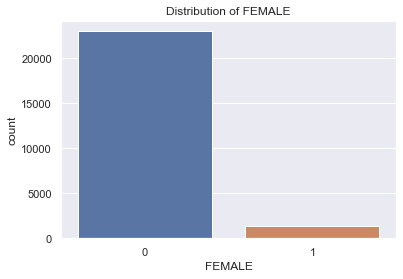

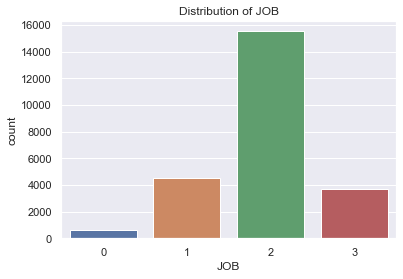

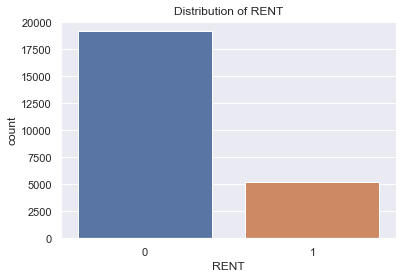

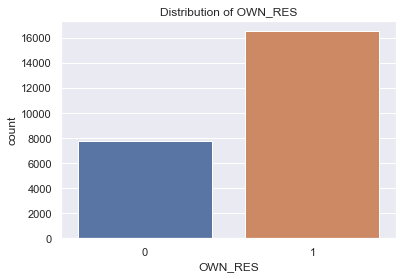

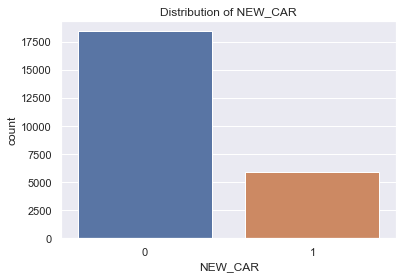

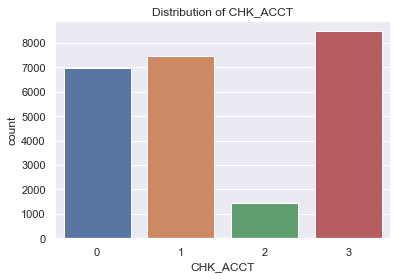

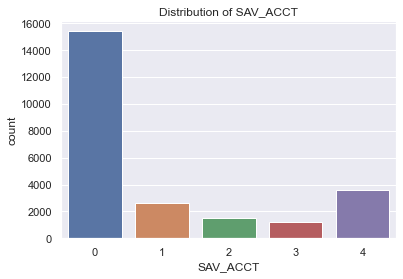

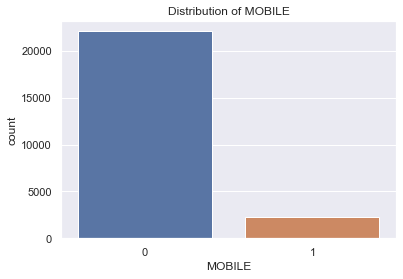

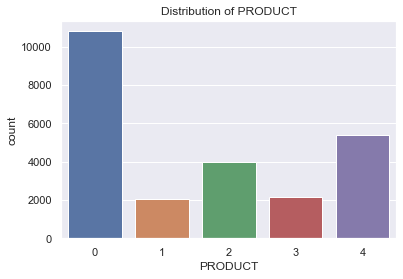

In [11]:
categorical_columns = ['FEMALE', 'JOB', 'RENT', 'OWN_RES', 'NEW_CAR', 'CHK_ACCT', 'SAV_ACCT', 'MOBILE', 'PRODUCT']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# CORRELATION RELATIONSHIP

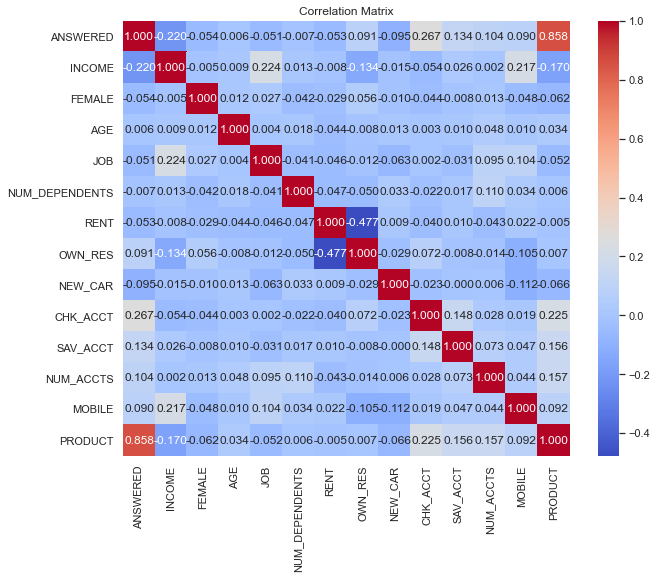

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(3), annot=True, fmt=".3f", cmap='coolwarm')  # Rounds to 3 decimal places
plt.title('Correlation Matrix')
plt.show()

# Training

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## All data

In [16]:
X = data.drop(columns=['PRODUCT', 'ANSWERED'])   # Features
y = data['PRODUCT']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# List of models to try
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store each model's accuracy
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    
    # Print the model's name and accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    #print(classification_report(y_test, y_pred))
    print("-" * 50)


Random Forest Accuracy: 0.74
--------------------------------------------------
Logistic Regression Accuracy: 0.44
--------------------------------------------------
Support Vector Classifier Accuracy: 0.44
--------------------------------------------------
K-Nearest Neighbors Accuracy: 0.41
--------------------------------------------------
Decision Tree Accuracy: 0.66
--------------------------------------------------
Gradient Boosting Accuracy: 0.61
--------------------------------------------------
Naive Bayes Accuracy: 0.49
--------------------------------------------------


## Data with ANSWERED = 1

In [18]:
data_filter = data[data['PRODUCT'] != 0]
data_filter.describe()

,ANSWERED,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,PRODUCT
count,13527.0,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000,13527.000000
mean,1.0,27910.991646,0.043321,34.840541,1.885710,1.138612,0.193095,0.717750,0.205071,1.764028,1.149775,2.463961,0.115916,2.803874
std,0.0,21421.573898,0.203586,11.153033,0.639599,0.345554,0.394742,0.450111,0.403769,1.249065,1.569584,1.167610,0.320136,1.118866
min,1.0,1640.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,13333.500000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000
50%,1.0,21262.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
75%,1.0,34783.500000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,4.000000
max,1.0,158863.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


In [19]:
X = data_filter.drop(columns=['PRODUCT', 'ANSWERED'])   # Features
y = data_filter['PRODUCT']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store each model's accuracy
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    
    # Print the model's name and accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    #print(classification_report(y_test, y_pred))
    print("-" * 50)


Random Forest Accuracy: 0.74
--------------------------------------------------
Logistic Regression Accuracy: 0.39
--------------------------------------------------
Support Vector Classifier Accuracy: 0.39
--------------------------------------------------
K-Nearest Neighbors Accuracy: 0.40
--------------------------------------------------
Decision Tree Accuracy: 0.66
--------------------------------------------------
Gradient Boosting Accuracy: 0.65
--------------------------------------------------
Naive Bayes Accuracy: 0.43
--------------------------------------------------


## Insights: Random Forest produces the best results
## Segment only answered value = 1 does not improve prediction accuracy

# Using Random Forest for all records predicting 5 types of product

In [21]:
X = data.drop(columns=['PRODUCT', 'ANSWERED'])   # Features
y = data['PRODUCT']                              # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7385500102690491


In [23]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      2125
           1       0.62      0.53      0.57       400
           2       0.66      0.59      0.63       762
           3       0.69      0.57      0.62       414
           4       0.74      0.69      0.71      1168

    accuracy                           0.74      4869
   macro avg       0.70      0.65      0.67      4869
weighted avg       0.73      0.74      0.73      4869



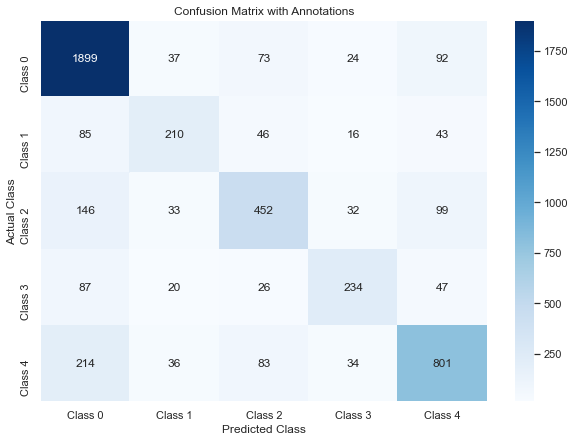

In [26]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"]

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

# Normalize the confusion matrix to have percentages instead of raw counts 

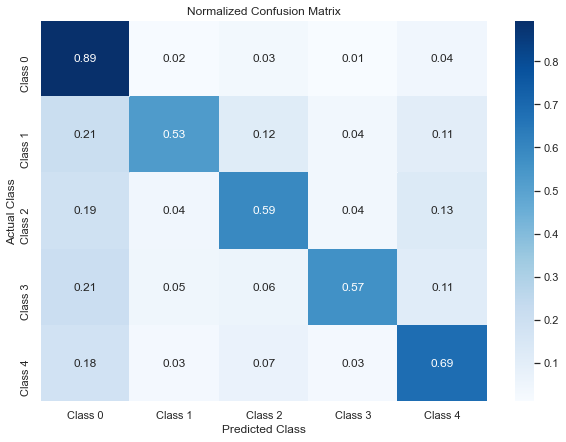

In [27]:
import numpy as np
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# Plotting the normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Normalized Confusion Matrix")
plt.show()

# Values

- The Random Forest model can help the sales team focus on higher-revenue product types (e.g., Intermediate and Advanced plans), which are associated with higher customer value.
- The model does well on the highest-value classes: 

Product Type 4 with 74% precision and 69% recall.

Product Type 3 with 69% precision and 57% recall.

- Also, with 78% precision for Product Type 0, the sales team can avoid spending time on people will not likely to answer the call

- By accurately identifying customers who are more likely to purchase these higher-revenue products, avoild no answer customers the sales team can focus their efforts strategically, increasing overall revenue. 

# Feature important

In [31]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)


Feature Importances:
 INCOME            0.422230
AGE               0.179615
NUM_ACCTS         0.081555
CHK_ACCT          0.073808
JOB               0.061816
SAV_ACCT          0.061199
NEW_CAR           0.023647
NUM_DEPENDENTS    0.023570
OWN_RES           0.020883
RENT              0.020301
MOBILE            0.018456
FEMALE            0.012919
dtype: float64


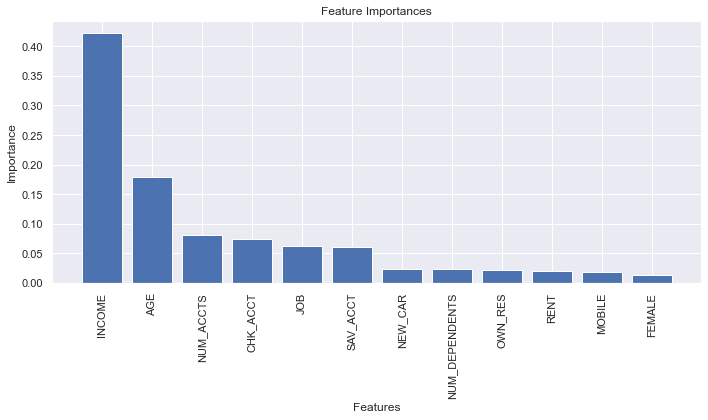

In [35]:
indices = np.argsort(feature_importances)[::-1]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_importances.index[indices], rotation=90)  # Use feature names for x-ticks
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()  # Adjust layout for better fitting of labels
plt.show()

#### Income is the most important, accounting for 42.2% of the total importance across all features.
#### Age is second most important feature, age contributes 17.9% to the predictions.

In [36]:
# Create a DataFrame from the test set
test_results = pd.DataFrame(X_test)
test_results['Actual'] = y_test.values  # True labels
test_results['Predicted'] = y_pred       # Predicted labels

In [51]:
test_results.describe()

,INCOME,FEMALE,AGE,JOB,NUM_DEPENDENTS,RENT,OWN_RES,NEW_CAR,CHK_ACCT,SAV_ACCT,NUM_ACCTS,MOBILE,Actual,Predicted
count,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000
mean,33600.644075,0.050318,34.605463,1.913945,1.150750,0.221606,0.678168,0.235777,1.471760,1.001643,2.362292,0.096529,1.609776,1.446704
std,29232.028967,0.218623,11.268854,0.659135,0.357841,0.415370,0.467227,0.424527,1.229714,1.504716,1.204016,0.295346,1.649467,1.649022
min,1417.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13427.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,23297.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,42419.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000,3.000000
max,160688.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000,4.000000


In [38]:
# Extracting information for products 0, 3, and 4
product_0_info = test_results[test_results['Predicted'] == 0]
product_3_info = test_results[test_results['Predicted'] == 3]
product_4_info = test_results[test_results['Predicted'] == 4]

In [46]:
all_products_info = pd.concat([product_0_info.assign(Product=0),
                                product_3_info.assign(Product=3),
                                product_4_info.assign(Product=4)])

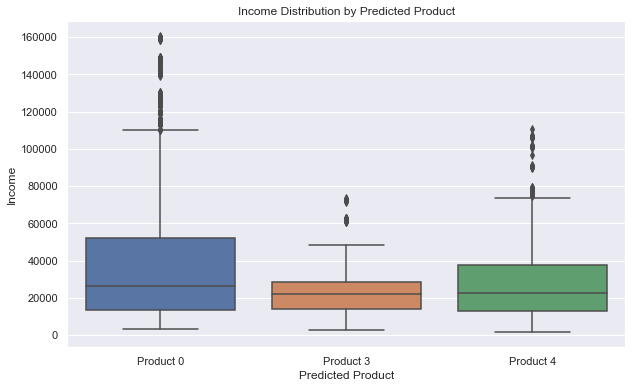

In [47]:
# Example: Box plot for Income by Predicted Product
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='INCOME', data=all_products_info)
plt.title('Income Distribution by Predicted Product')
plt.xlabel('Predicted Product')
plt.ylabel('Income')
plt.xticks([0, 1, 2], ['Product 0', 'Product 3', 'Product 4'])
plt.show()

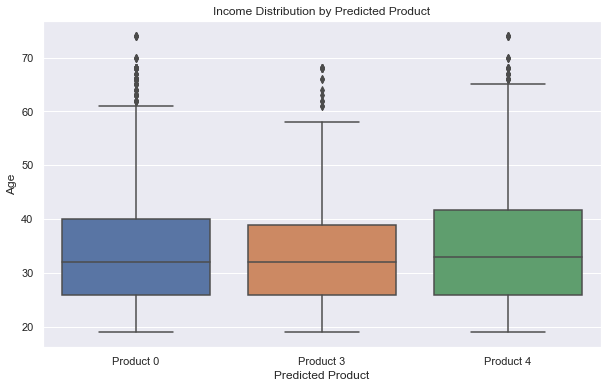

In [42]:
# Example: Box plot for Income by Predicted Product
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='AGE', data=all_products_info)
plt.title('Income Distribution by Predicted Product')
plt.xlabel('Predicted Product')
plt.ylabel('Age')
plt.xticks([0, 1, 2], ['Product 0', 'Product 3', 'Product 4'])
plt.show()

In [48]:
# Summary statistics for income by predicted product
product_0_income_summary = product_0_info['INCOME'].describe()
product_3_income_summary = product_3_info['INCOME'].describe()
product_4_income_summary = product_4_info['INCOME'].describe()

print("Income Summary for Product 0:\n", product_0_income_summary)
print("\nIncome Summary for Product 3:\n", product_3_income_summary)
print("\nIncome Summary for Product 4:\n", product_4_income_summary)

Income Summary for Product 0:
 count      2431.000000
mean      39897.348828
std       34688.862681
min        3195.000000
25%       13588.000000
50%       26534.000000
75%       52166.500000
max      160688.000000
Name: INCOME, dtype: float64

Income Summary for Product 3:
 count      340.000000
mean     24578.867647
std      15667.710118
min       2753.000000
25%      14076.250000
50%      21867.000000
75%      28496.250000
max      73825.000000
Name: INCOME, dtype: float64

Income Summary for Product 4:
 count      1082.000000
mean      29073.268946
std       21845.124951
min        1417.000000
25%       13137.500000
50%       22709.000000
75%       37545.750000
max      110905.000000
Name: INCOME, dtype: float64


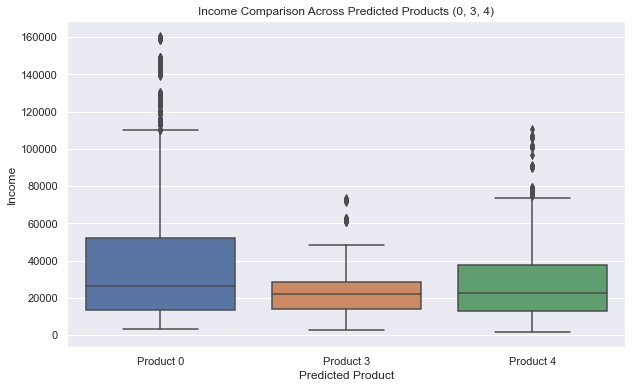

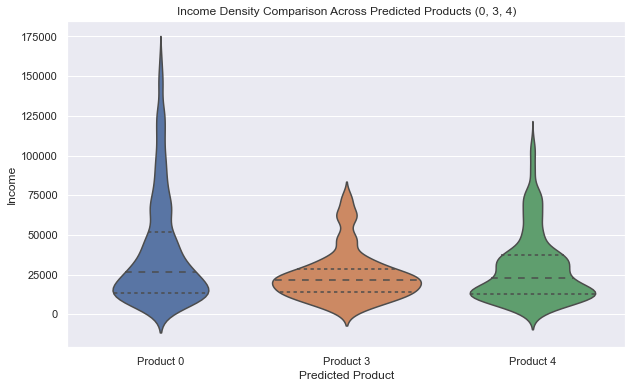

In [49]:

# Combine the income data for products 0, 3, and 4
income_data = pd.concat([
    product_0_info.assign(Product='Product 0'),
    product_3_info.assign(Product='Product 3'),
    product_4_info.assign(Product='Product 4')
])

# Box plot for income distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product', y='INCOME', data=income_data)
plt.title('Income Comparison Across Predicted Products (0, 3, 4)')
plt.ylabel('Income')
plt.xlabel('Predicted Product')
plt.show()

# Violin plot (optional) for more detailed density visualization
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product', y='INCOME', data=income_data, inner='quartile')
plt.title('Income Density Comparison Across Predicted Products (0, 3, 4)')
plt.ylabel('Income')
plt.xlabel('Predicted Product')
plt.show()
